# Predicting Diabetes

## Lolyna de la Fuente Ordaz

### 1. Exploratory Data Analysis (EDA)

#### Data Loading and Inspection

In [114]:
# Libraries and Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.inspection import permutation_importance

#### Loading the Diabetes dataset into a pandas Data Frame

This dataset was downloaded from: [Kaggle Diabetes Dataset](https://www.kaggle.com/datasets/vikasukani/diabetes-data-set)

In [115]:
# Reading our database
diabetes = pd.read_csv("diabetes.csv")
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


#### Displaying the first few rows of the dataset to understand its structure.

In [116]:
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
5,0,173,78,32,265,46.5,1.159,58,0
6,4,99,72,17,0,25.6,0.294,28,0
7,8,194,80,0,0,26.1,0.551,67,0
8,2,83,65,28,66,36.8,0.629,24,0
9,2,89,90,30,0,33.5,0.292,42,0


In [117]:
# Understanding its contents
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [118]:
# Checking for Shape
diabetes.shape

(2000, 9)

#### Visualizations

##### Boxplot

<AxesSubplot:>

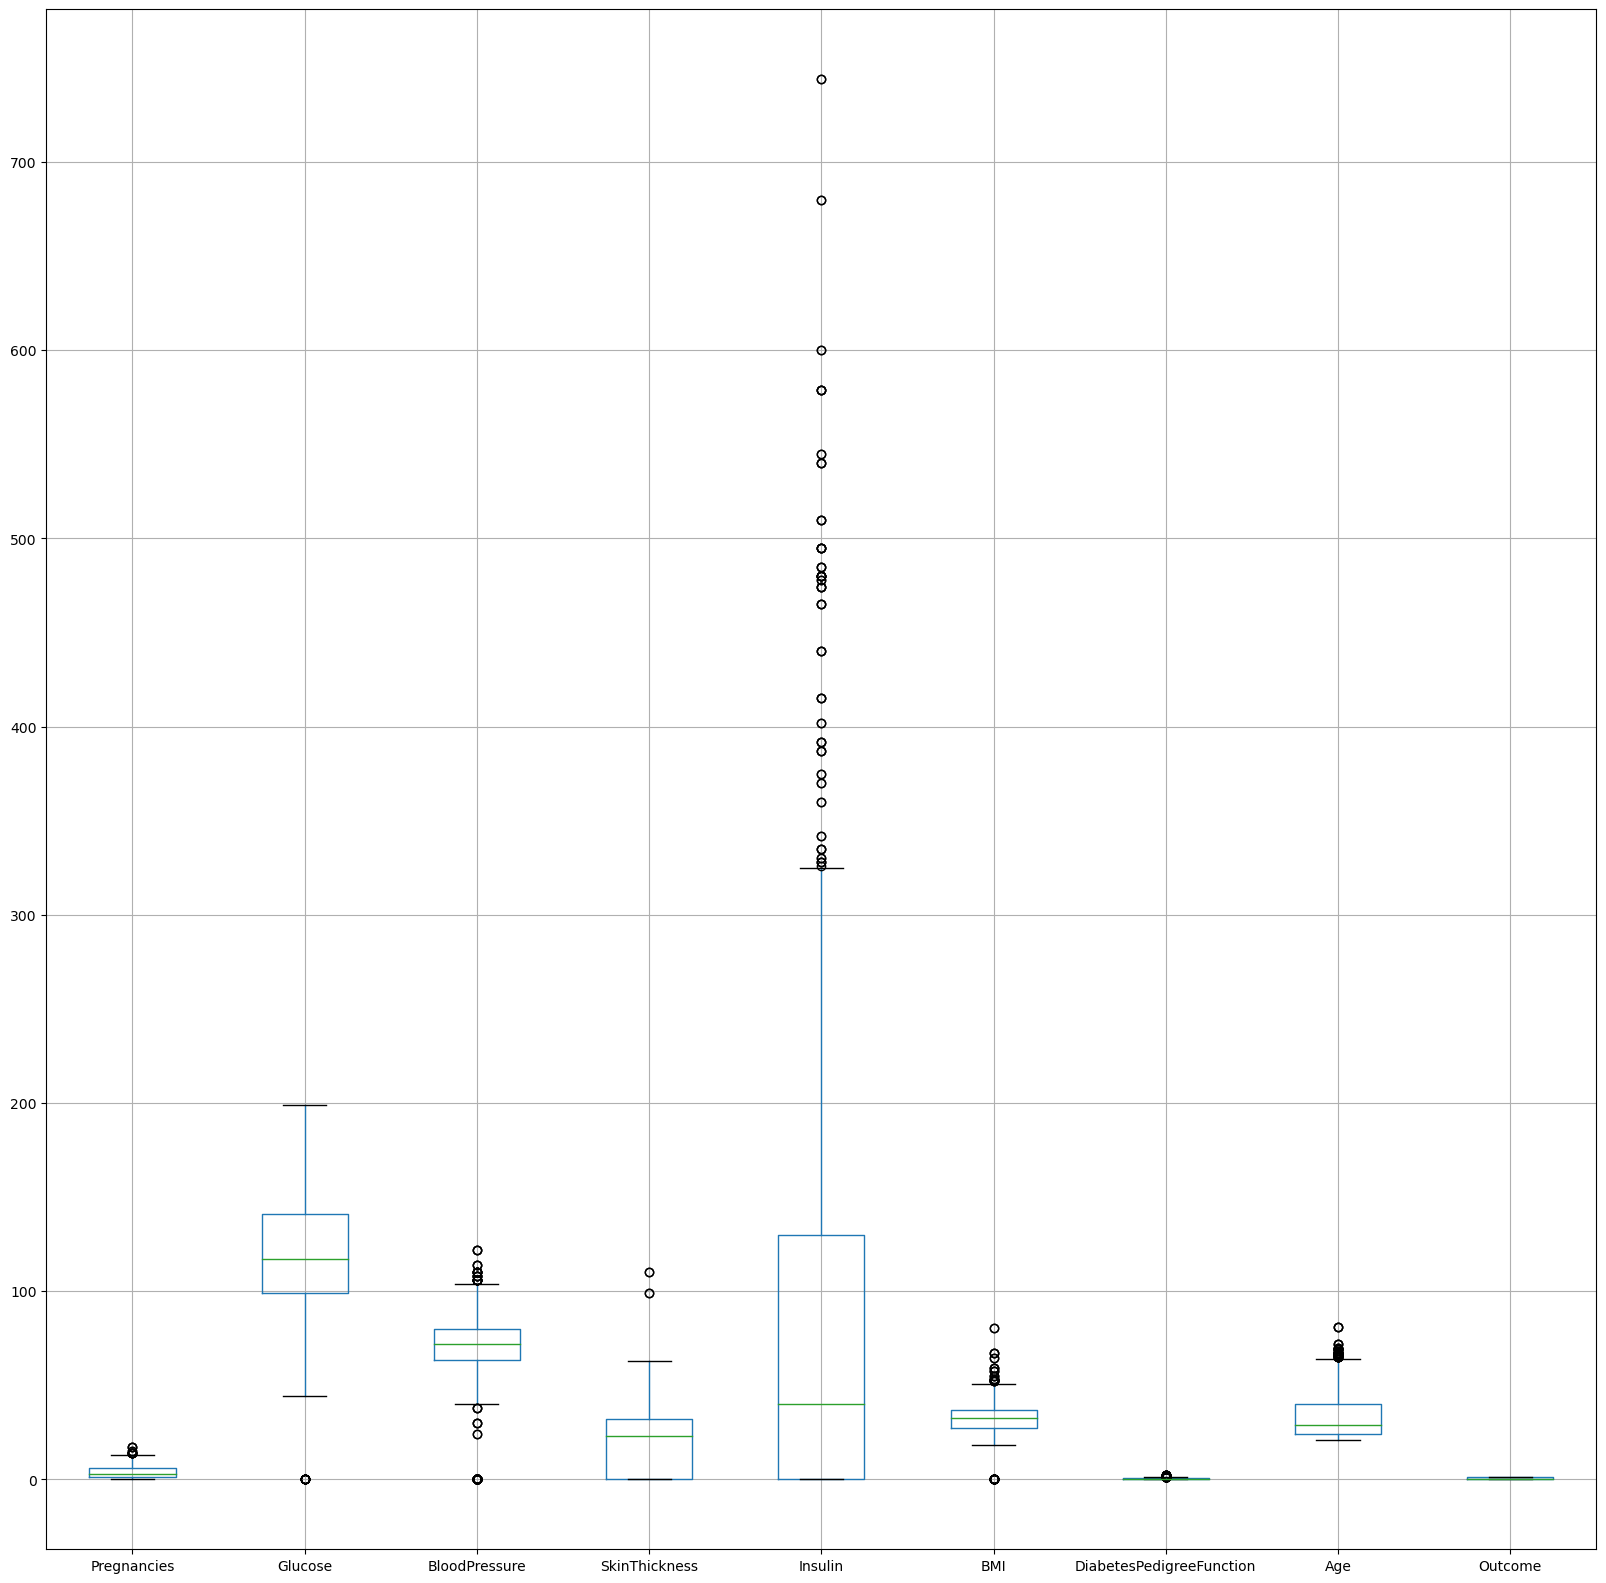

In [119]:
diabetes.boxplot(figsize=(20,20))

##### Histogram

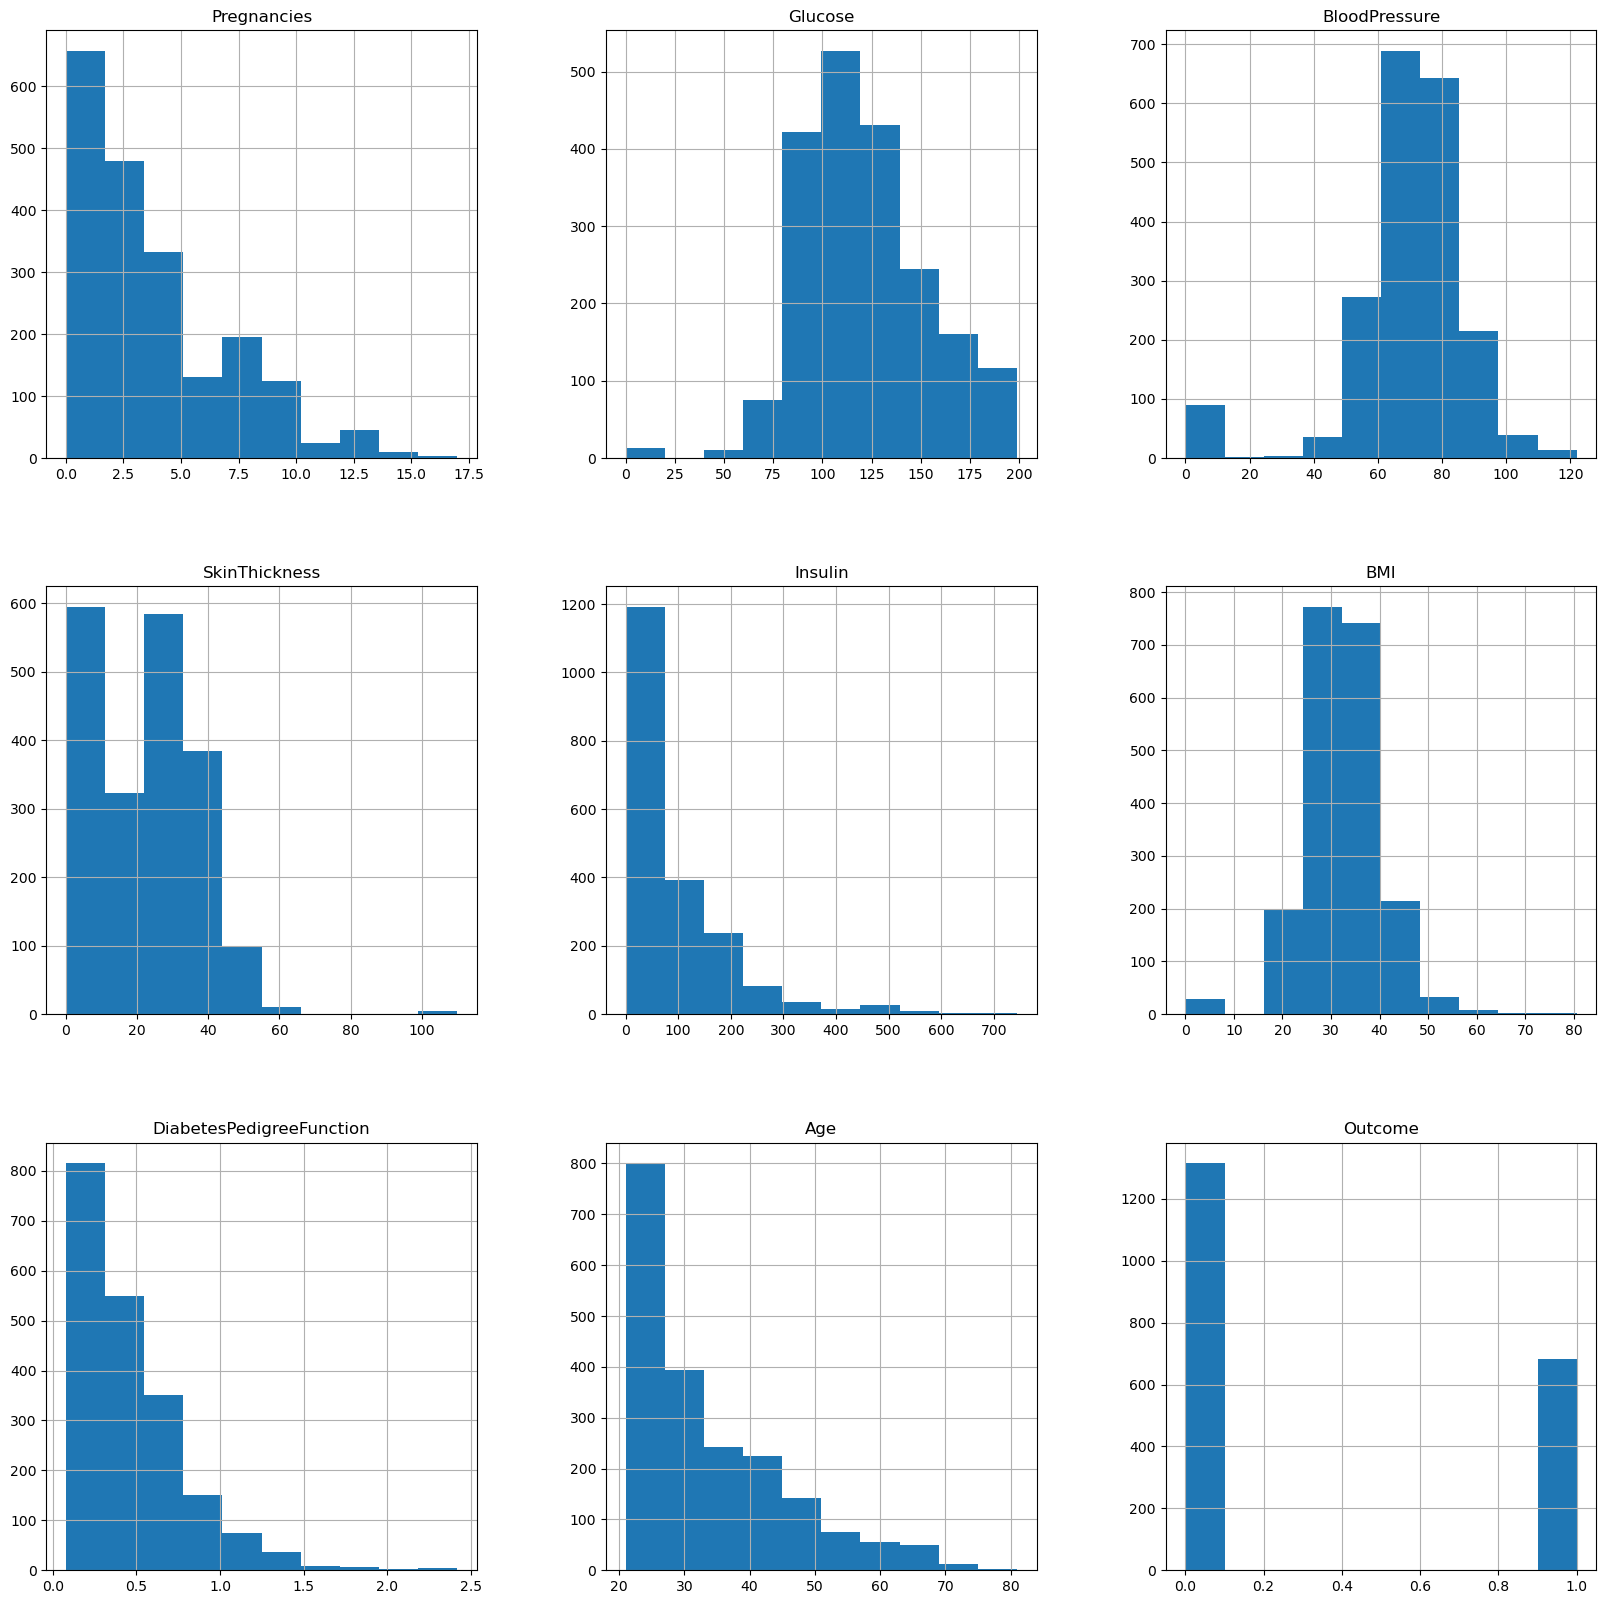

In [120]:
#Histogram for each variable
hist = diabetes.hist(figsize=(20,20))
plt.show()

##### PairPlot

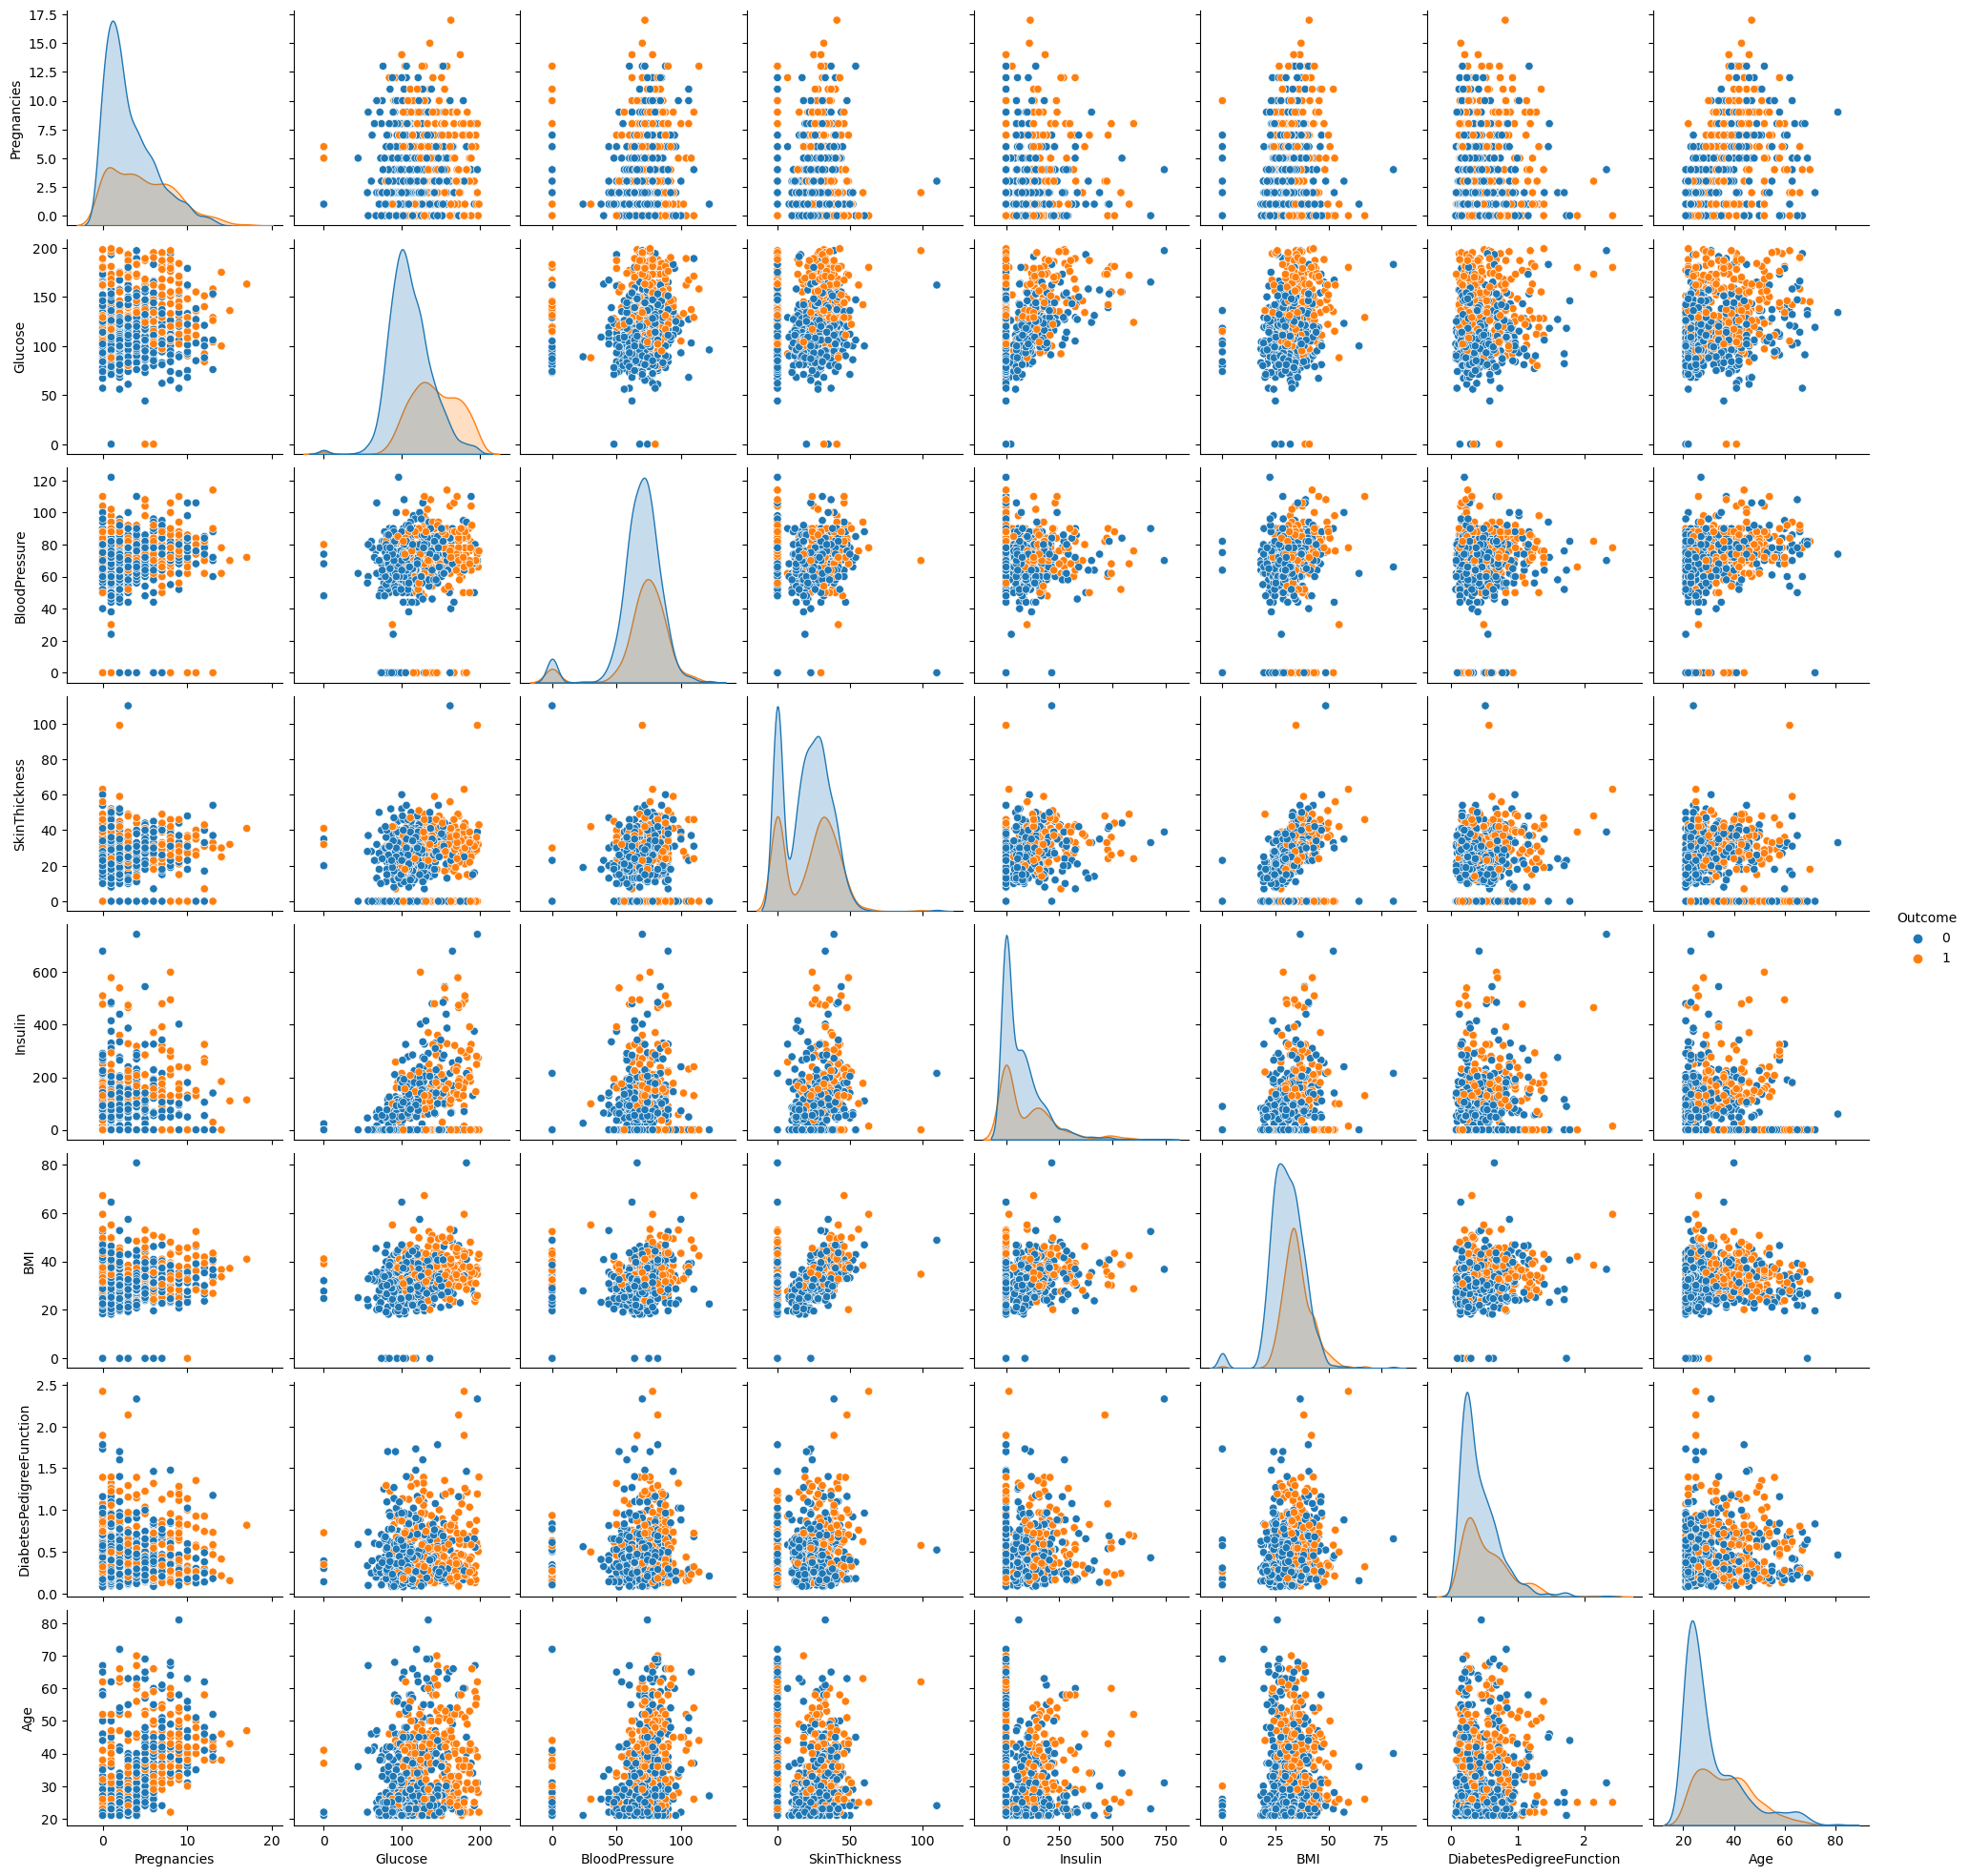

In [121]:
sns.pairplot(data = diabetes, hue = 'Outcome')

### 2. Data Pre-processing

#### Checking for any missing values in the dataset.

In [122]:
# Checking for total null values in the database
print('Total Null Values:')
print(diabetes.isnull().sum().sum())

Total Null Values:
0


#### Identifying columns with missing values

In [123]:
# Checking for null values in the database
print('NaN in columns:')
print(diabetes.isnull().sum(axis = 0))

print('NaN in rows:')
print(diabetes.isnull().sum(axis = 1))

NaN in columns:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
NaN in rows:
0       0
1       0
2       0
3       0
4       0
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Length: 2000, dtype: int64


In [124]:
# Checking for the value ranges of our variables
x = diabetes.describe()
x.T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


#### Decide on an appropriate strategy to handle 'impossible' values (values = 0).
The value 0 on these columns is referred to as 'impossible' because it simply can't be that (e.g. Glucose).

There's 5 columns with 'impossible' values: 
- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI

For all of these variables we replaced the 0 with their mean.


In [125]:
glu = diabetes['Glucose'].mean()
diabetes['Glucose'] = diabetes['Glucose'].replace(0, glu)

In [126]:
bp = diabetes['BloodPressure'].mean()
diabetes['BloodPressure'] = diabetes['BloodPressure'].replace(0, bp)

In [127]:
st = diabetes['SkinThickness'].mean()
diabetes['SkinThickness'] = diabetes['SkinThickness'].replace(0, st)

In [128]:
insulin = diabetes['Insulin'].mean()
diabetes['Insulin'] = diabetes['Insulin'].replace(0, insulin)

In [129]:
bmi = diabetes['BMI'].mean()
diabetes['BMI'] = diabetes['BMI'].replace(0, bmi)

#### Final 'Impossible' Values Check After Modifications

In [130]:
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.0000,35.000,80.254,33.6,0.127,47,1
1,0,84.0,82.0000,31.000,125.000,38.2,0.233,23,0
2,0,145.0,69.1455,20.935,80.254,44.2,0.630,31,1
3,0,135.0,68.0000,42.000,250.000,42.3,0.365,24,1
4,1,139.0,62.0000,41.000,480.000,40.7,0.536,21,0
5,0,173.0,78.0000,32.000,265.000,46.5,1.159,58,0
6,4,99.0,72.0000,17.000,80.254,25.6,0.294,28,0
7,8,194.0,80.0000,20.935,80.254,26.1,0.551,67,0
8,2,83.0,65.0000,28.000,66.000,36.8,0.629,24,0
9,2,89.0,90.0000,30.000,80.254,33.5,0.292,42,0


We now have replaced the 'impossible' values in our dataset, which now makes it easier for further analysis.

### 3. Feature Engineering

#### Creating a new feature that represents if a patient is overweight (BMI > 25).

According to the US Centers For Disease Control and Prevention (CDC) if the BMI > 25, an adult is considered as Overweight. For more information visit this [link](https://www.cdc.gov/bmi/adult-calculator/bmi-categories.html).

In [131]:
diabetes['Overweight'] = 0
diabetes.loc[diabetes['BMI'] > 25, 'Overweight'] = 1
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Overweight
0,2,138.0,62.0000,35.000,80.254,33.6,0.127,47,1,1
1,0,84.0,82.0000,31.000,125.000,38.2,0.233,23,0,1
2,0,145.0,69.1455,20.935,80.254,44.2,0.630,31,1,1
3,0,135.0,68.0000,42.000,250.000,42.3,0.365,24,1,1
4,1,139.0,62.0000,41.000,480.000,40.7,0.536,21,0,1
...,...,...,...,...,...,...,...,...,...,...
1995,2,75.0,64.0000,24.000,55.000,29.7,0.370,33,0,1
1996,8,179.0,72.0000,42.000,130.000,32.7,0.719,36,1,1
1997,6,85.0,78.0000,20.935,80.254,31.2,0.382,42,0,1
1998,0,129.0,110.0000,46.000,130.000,67.1,0.319,26,1,1


#### Exploring if this new feature correlates with the outcome of a patient.

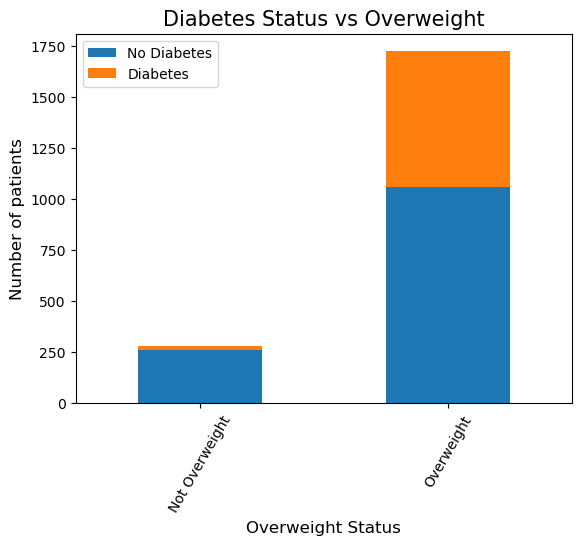

In [132]:
_, ax = plt.subplots()

x = pd.crosstab(diabetes['Overweight'], diabetes['Outcome'])

# Plotting our bar chart with stacked values
labels_overweight = ['Not Overweight', 'Overweight']
x.plot(kind="bar", stacked=True, ax=ax)

ax.set_ylabel('Number of patients', size=12)
ax.set_xlabel('Overweight Status', size=12)
ax.set_xticklabels(labels_overweight)
plt.title('Diabetes Status vs Overweight', size=15)

# Rotating x labels a little bit
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)

# Changing labels of columns to be displayed as legend
labels_legend = ['No Diabetes', 'Diabetes']
ax.legend(labels=labels_legend)

plt.show()

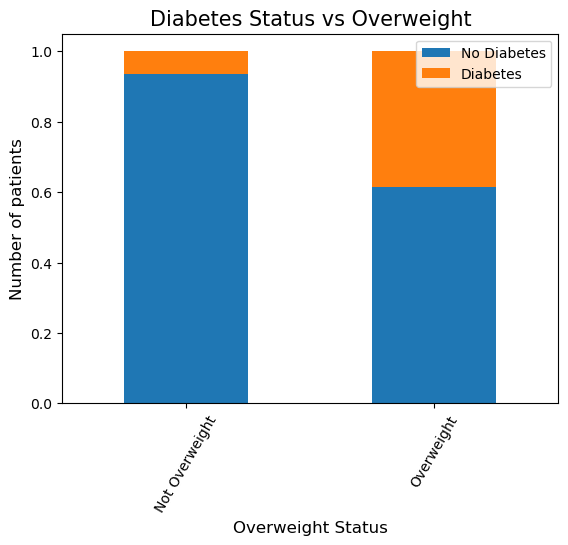

In [133]:
_, ax = plt.subplots()

x = pd.crosstab(diabetes['Overweight'], diabetes['Outcome'], normalize= 'index')

# Plotting our bar chart with stacked values
labels_overweight = ['Not Overweight', 'Overweight']
x.plot(kind="bar", stacked=True, ax=ax)

ax.set_ylabel('Number of patients', size=12)
ax.set_xlabel('Overweight Status', size=12)
ax.set_xticklabels(labels_overweight)
plt.title('Diabetes Status vs Overweight', size=15)

# Rotating x labels a little bit
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)

# Changing labels of columns to the displayed as legend
labels_legend = ['No Diabetes', 'Diabetes']
ax.legend(labels=labels_legend)

plt.show()

What these visuals tell us is that if a patient is overweight, the probability of having Diabetes increases significantly.

### 4. Conditional Visualization Points

#### Correlation Between Features

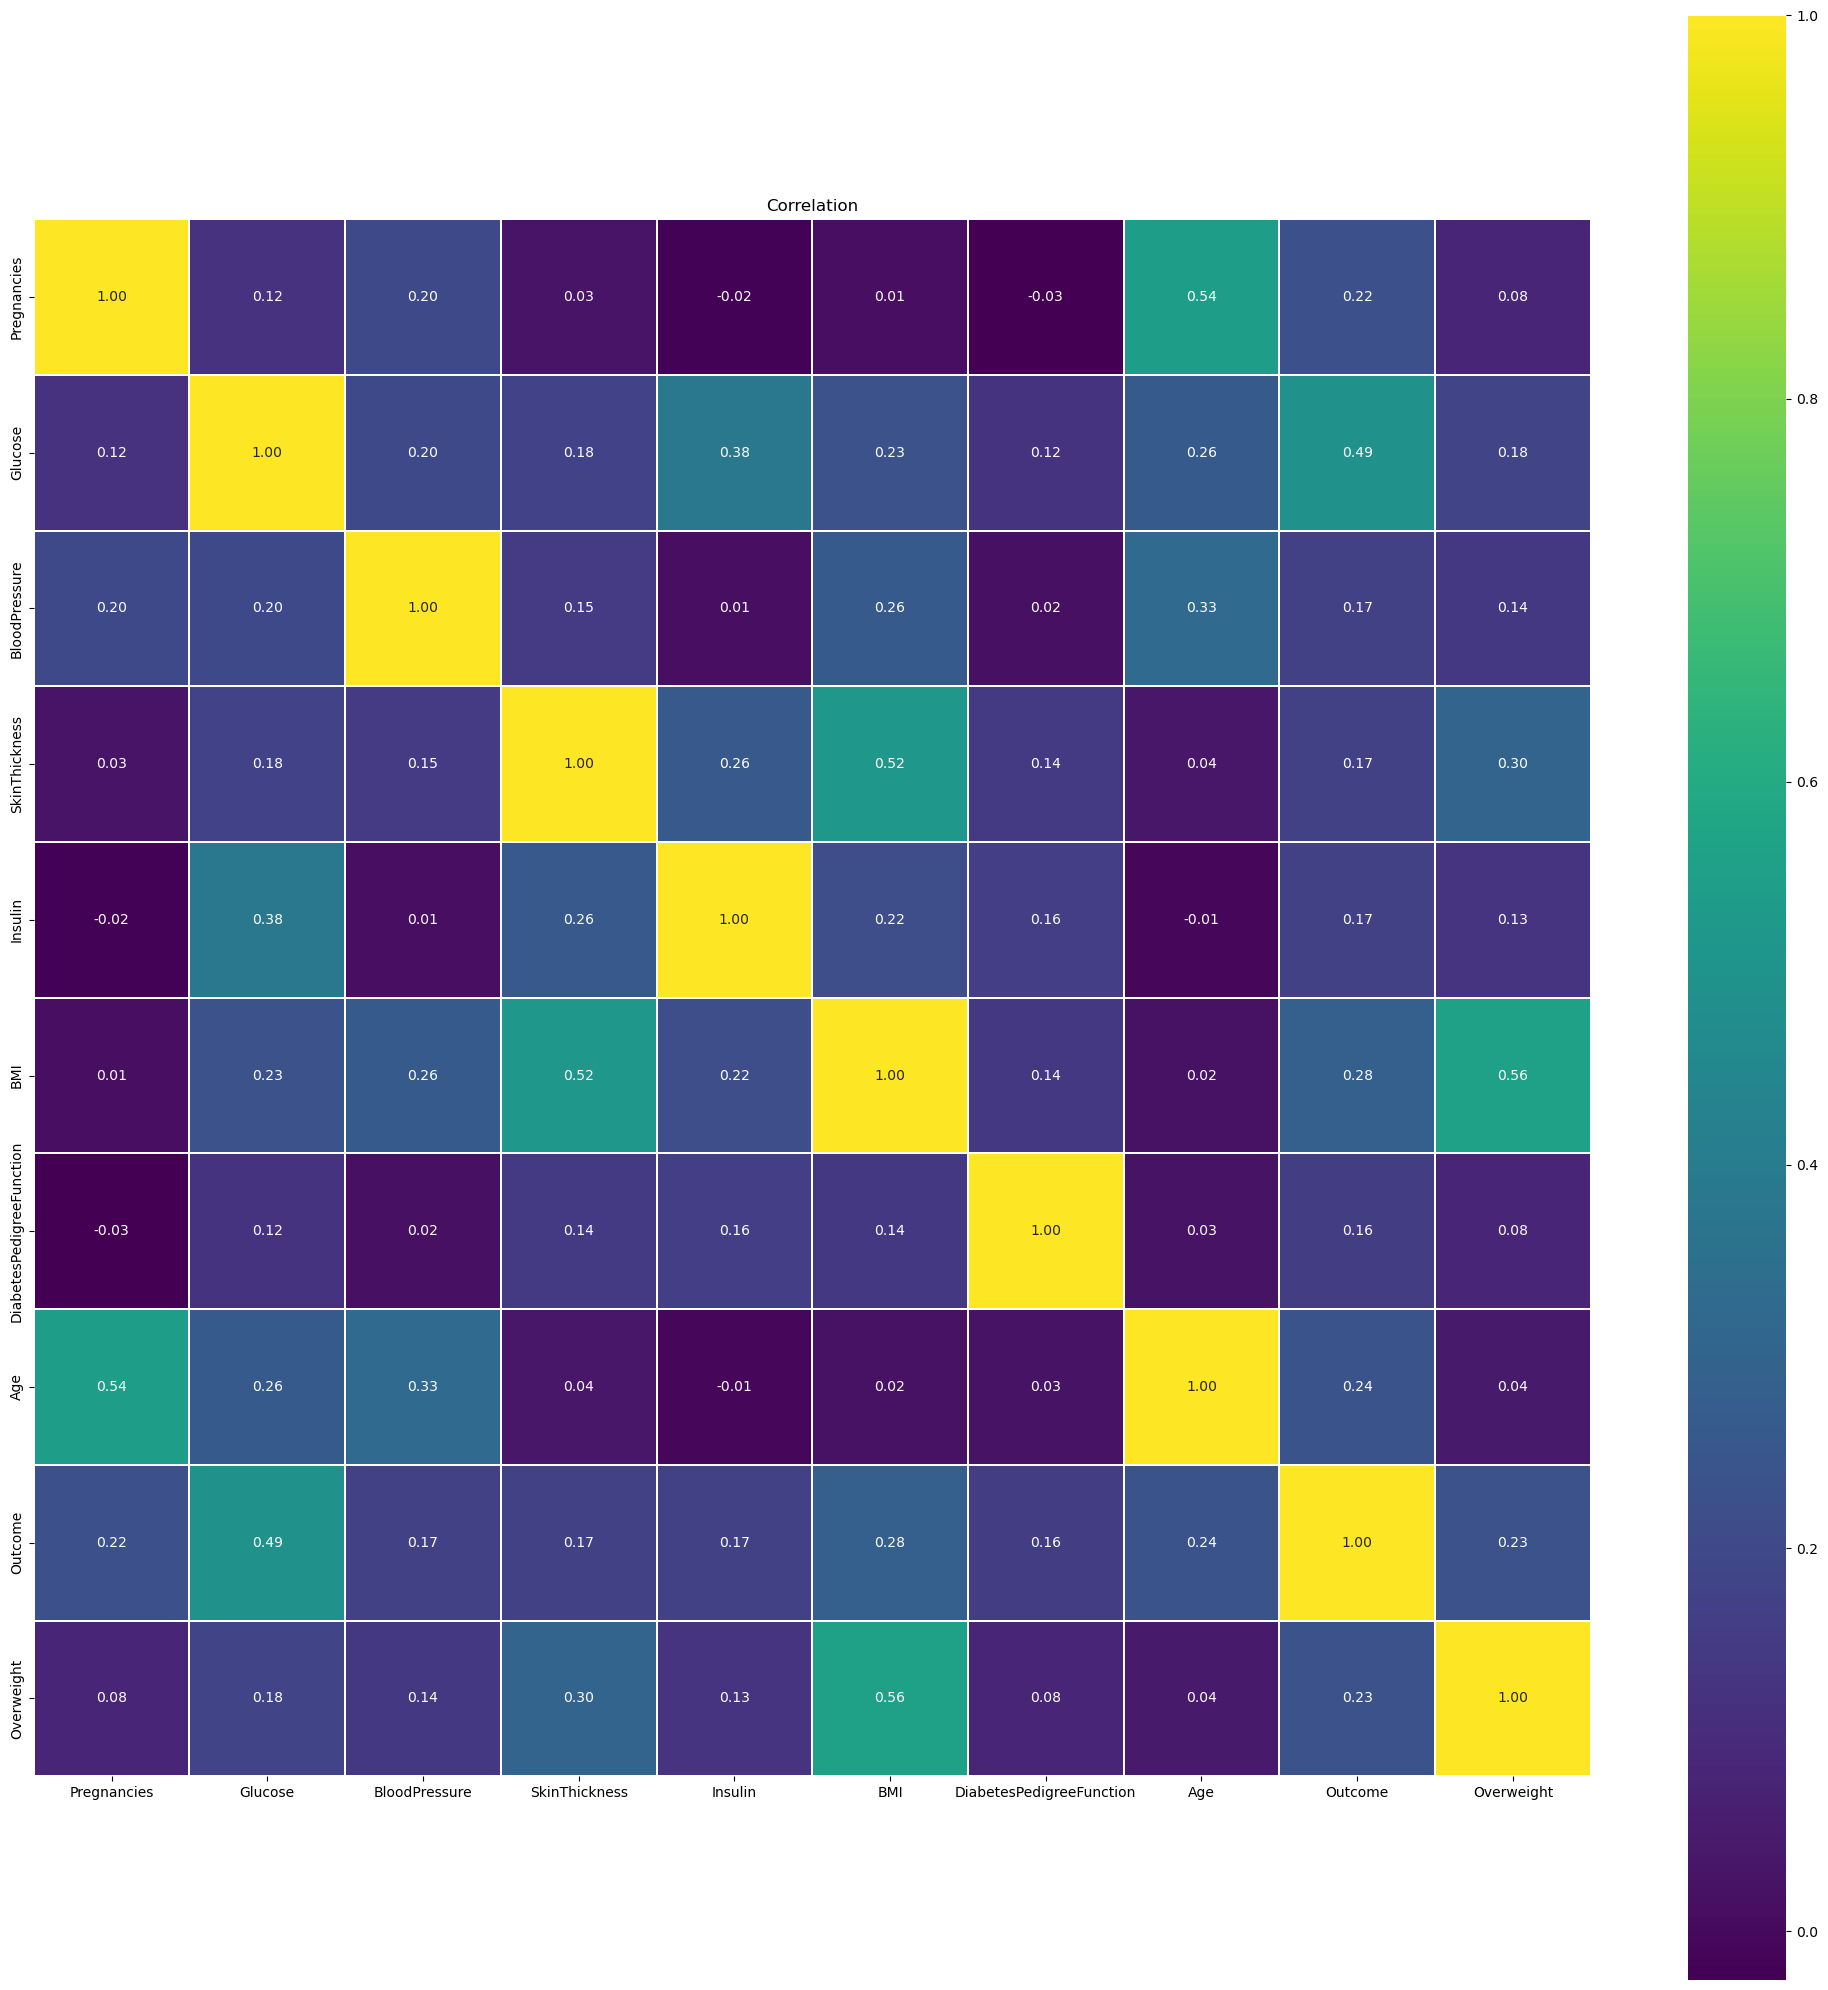

In [134]:
# Using a heatmap to visualize the correlation between different features in the dataset
plt.figure(figsize=(20,20))
sns.heatmap(diabetes.corr(), annot= True, fmt= '.2f', linewidths= 0.2, square = True, cmap='viridis').set_title('Correlation')
plt.tight_layout()
plt.show()

In [135]:
#Numerical Data from the HeatMap
diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Overweight
Pregnancies,1.000000,0.121569,0.199471,0.028116,-0.020319,0.011439,-0.025453,0.539457,0.224437,0.082022
Glucose,0.121569,1.000000,0.200509,0.175337,0.384706,0.233228,0.124176,0.259853,0.487977,0.179890
BloodPressure,0.199471,0.200509,1.000000,0.154736,0.012714,0.259445,0.015216,0.325490,0.171844,0.139008
SkinThickness,0.028116,0.175337,0.154736,1.000000,0.257060,0.520245,0.143700,0.035946,0.170856,0.299305
Insulin,-0.020319,0.384706,0.012714,0.257060,1.000000,0.217047,0.161557,-0.009007,0.171339,0.128813
BMI,0.011439,0.233228,0.259445,0.520245,0.217047,1.000000,0.142019,0.018815,0.282615,0.556336
DiabetesPedigreeFunction,-0.025453,0.124176,0.015216,0.143700,0.161557,0.142019,1.000000,0.026569,0.155459,0.079732
Age,0.539457,0.259853,0.325490,0.035946,-0.009007,0.018815,0.026569,1.000000,0.236509,0.044789
Outcome,0.224437,0.487977,0.171844,0.170856,0.171339,0.282615,0.155459,0.236509,1.000000,0.234830
Overweight,0.082022,0.179890,0.139008,0.299305,0.128813,0.556336,0.079732,0.044789,0.234830,1.000000


#### Distribution of Patients with Diabetes or Not

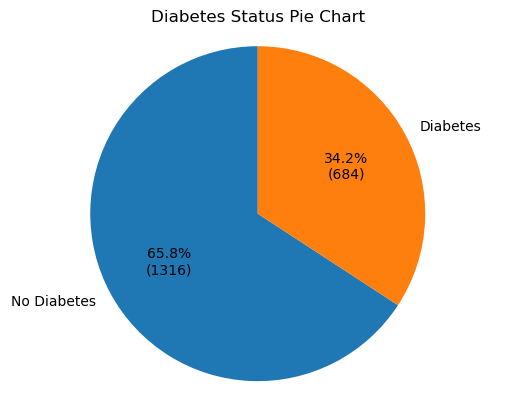

In [136]:
x = diabetes['Outcome'].value_counts()
labels = ['No Diabetes', 'Diabetes']

def cust_format(x):
    format = '{:.1f}%\n({:.0f})'.format(x, total*x/100)
    return format

total = len(diabetes['Outcome'])

fig1, ax1 = plt.subplots()
ax1.pie(x, labels=labels, autopct= cust_format,
         startangle=90)
ax1.axis('equal')
ax1.set_title('Diabetes Status Pie Chart')
plt.show()

#### Histograms

##### Diabetes vs BMI Histogram

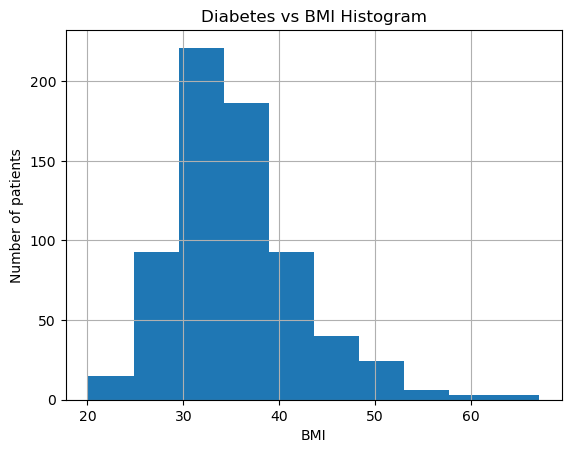

In [137]:
df2 = diabetes[diabetes['Outcome']==1]
df2['BMI'].hist()

plt.title("Diabetes vs BMI Histogram")
plt.xlabel("BMI")
plt.ylabel("Number of patients")
plt.show()

##### No Diabetes vs BMI Histogram

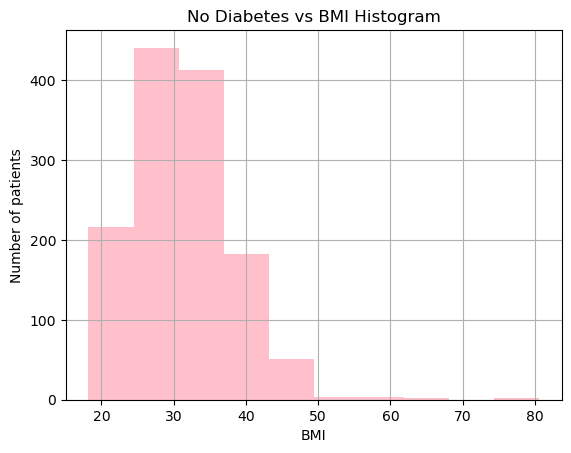

In [138]:
df2 = diabetes[diabetes['Outcome']==0]
df2['BMI'].hist(color = 'pink')

plt.title("No Diabetes vs BMI Histogram")
plt.xlabel("BMI")
plt.ylabel("Number of patients")
plt.show()

#### Scatter Plots

##### Outcome vs Blood Pressure

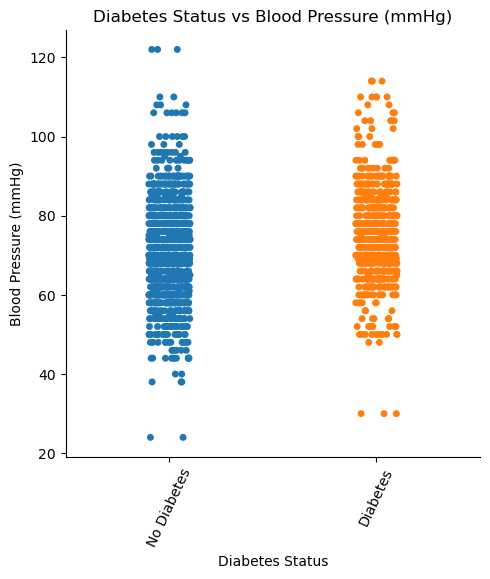

In [139]:
sns.catplot(data=diabetes, x="Outcome", y='BloodPressure', hue='Outcome')

ticks = ['No Diabetes', 'Diabetes']
y_pos = np.arange(len(ticks))

plt.title("Diabetes Status vs Blood Pressure (mmHg)")
plt.xlabel("Diabetes Status")
plt.xticks(y_pos, ticks, rotation = 65)
plt.ylabel("Blood Pressure (mmHg)")
plt.show()

##### Outcome vs Glucose

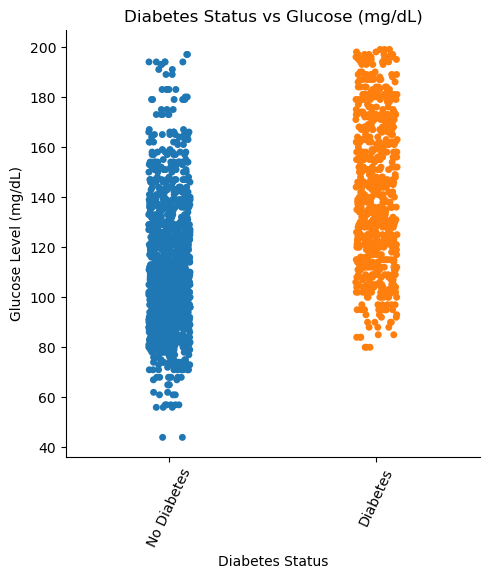

In [140]:
sns.catplot(data=diabetes, x="Outcome", y='Glucose', hue='Outcome')
ticks = ['No Diabetes', 'Diabetes']
y_pos = np.arange(len(ticks))

plt.title("Diabetes Status vs Glucose (mg/dL)")
plt.xlabel("Diabetes Status")
plt.xticks(y_pos, ticks, rotation = 65)
plt.ylabel("Glucose Level (mg/dL)")
plt.show()

##### Outcome vs BMI

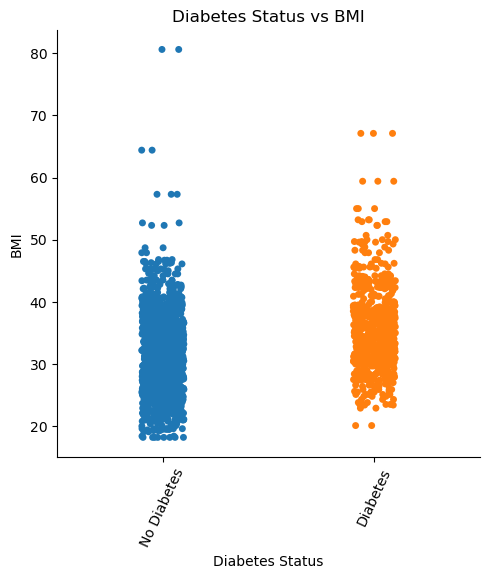

In [141]:
sns.catplot(data=diabetes, x="Outcome", y='BMI', hue='Outcome')

ticks = ['No Diabetes', 'Diabetes']
y_pos = np.arange(len(ticks))

plt.title("Diabetes Status vs BMI")
plt.xlabel("Diabetes Status")
plt.xticks(y_pos, ticks, rotation = 65)
plt.ylabel("BMI")
plt.show()

##### Outcome vs Diabetes Pedigree Function

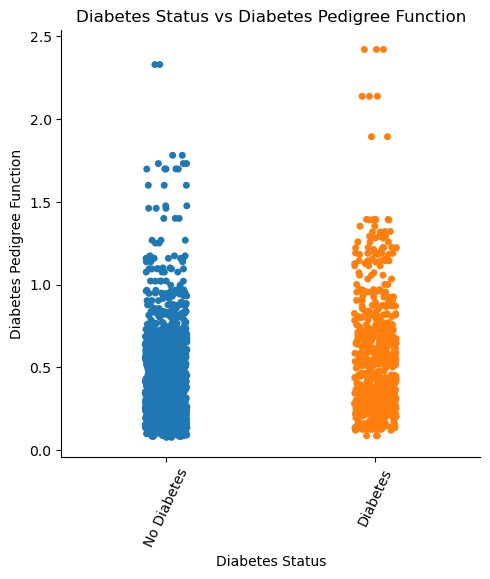

In [142]:
sns.catplot(data=diabetes, x="Outcome", y='DiabetesPedigreeFunction', hue='Outcome')

ticks = ['No Diabetes', 'Diabetes']
y_pos = np.arange(len(ticks))

plt.title("Diabetes Status vs Diabetes Pedigree Function")
plt.xlabel("Diabetes Status")
plt.xticks(y_pos, ticks, rotation = 65)
plt.ylabel("Diabetes Pedigree Function")
plt.show()

### 5. Model for Analysis

#### Train & Test Split

In [154]:
X = diabetes.iloc[:, [0,1,2,3,4,5,6,7,9]]
y = diabetes.iloc[:,8]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Random Forest Classifier

##### Model Training

In [155]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

##### Model Evaluation

In [156]:
y_pred_rf = rf_classifier.predict(X_test)

##### Random Forest Accuracy

In [157]:
accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy)

Random Forest Accuracy: 0.982


##### Random Forest Confusion Matrices

##### With Value Percentages

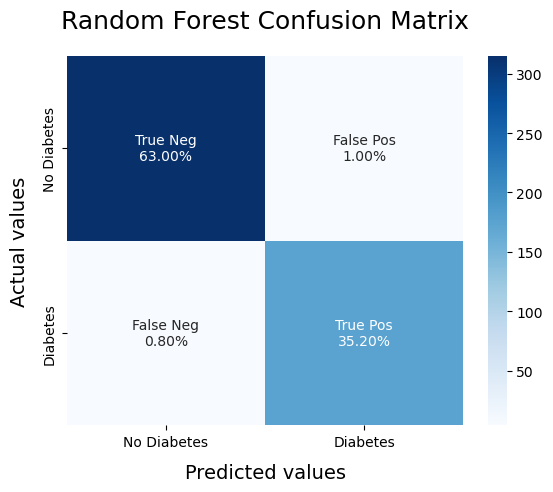

In [158]:
cm = confusion_matrix(y_test, y_pred_rf)

categories  = ['No Diabetes','Diabetes']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]

labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot = labels, cmap = 'Blues',fmt = '',
            xticklabels = categories, yticklabels = categories)

plt.xlabel('Predicted values', fontdict = {'size':14}, labelpad = 10)
plt.ylabel('Actual values', fontdict = {'size':14}, labelpad = 10)
plt.title ('Random Forest Confusion Matrix', fontdict = {'size':18}, pad = 20)
plt.show()

#####  With Value Counts

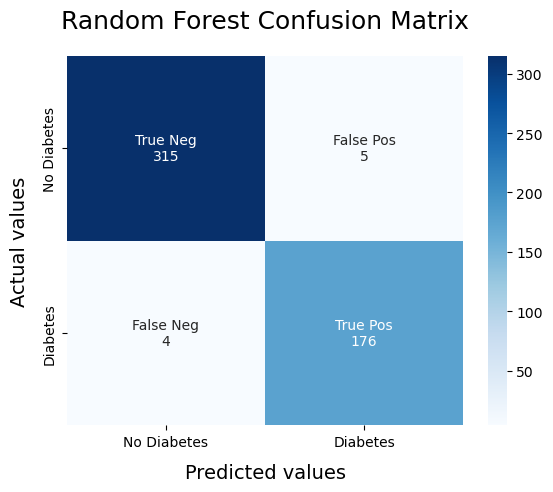

In [159]:
cm = confusion_matrix(y_test, y_pred_rf)

categories  = ['No Diabetes','Diabetes']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']

labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, cm.flatten())]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot = labels, cmap = 'Blues',fmt = '',
            xticklabels = categories, yticklabels = categories)

plt.xlabel('Predicted values', fontdict = {'size':14}, labelpad = 10)
plt.ylabel('Actual values', fontdict = {'size':14}, labelpad = 10)
plt.title ('Random Forest Confusion Matrix', fontdict = {'size':18}, pad = 20)
plt.show()

##### Random Forest Classification Report

In [160]:
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       320
           1       0.97      0.98      0.98       180

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500



#### Checking Feature Importance

##### Gini Importance

In [161]:
feature_names = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Overweight']
importances = rf_classifier.fit(X_train, y_train).feature_importances_
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False) 
print(feature_imp_df)

                    Feature  Gini Importance
1                   Glucose         0.254945
5                       BMI         0.156642
7                       Age         0.148100
6  DiabetesPedigreeFunction         0.121836
2             BloodPressure         0.084515
4                   Insulin         0.084019
0               Pregnancies         0.074227
3             SkinThickness         0.062373
8                Overweight         0.013343


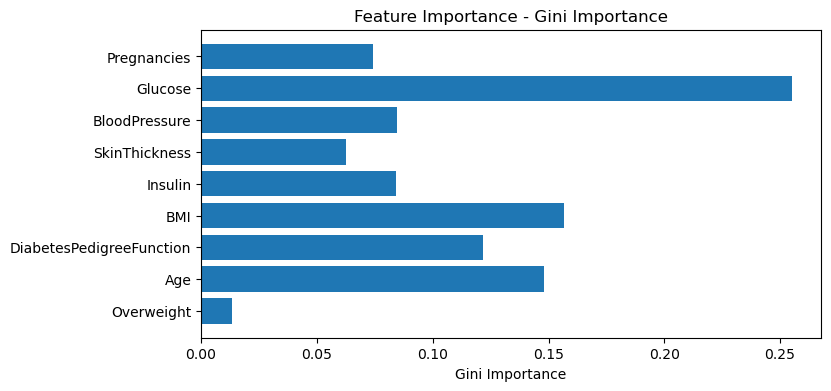

In [162]:
# Bar Plot for Gini Importance
plt.figure(figsize=(8, 4))
plt.barh(feature_names, importances)
plt.xlabel('Gini Importance')
plt.title('Feature Importance - Gini Importance')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

##### Permutation Importance

In [163]:
# Permutation feature importance
result = permutation_importance(rf_classifier.fit(X_train, y_train), X_test, y_test, n_repeats=10, random_state=0, n_jobs=-1)
perm_imp_df = pd.DataFrame({'Feature': feature_names, 'Permutation Importance': result.importances_mean}).sort_values('Permutation Importance', ascending=False)
print(perm_imp_df)

                    Feature  Permutation Importance
1                   Glucose                  0.2204
7                       Age                  0.0942
5                       BMI                  0.0918
6  DiabetesPedigreeFunction                  0.0390
4                   Insulin                  0.0310
2             BloodPressure                  0.0232
0               Pregnancies                  0.0228
3             SkinThickness                  0.0024
8                Overweight                  0.0024


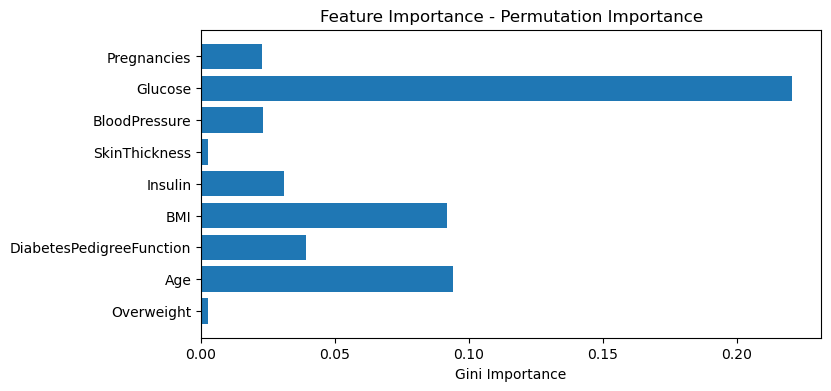

In [164]:
plt.figure(figsize=(8, 4))
plt.barh(feature_names, result.importances_mean)
plt.xlabel('Gini Importance')
plt.title('Feature Importance - Permutation Importance')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()